In [ ]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [52]:
# Import a large file using chucksize
chunk_df = pd.read_csv('C:/Users/Dell/Downloads/Eluvio.csv', iterator=True, chunksize=100000)
# we can also do preprocessing for chunksize of data before concatenating 
# concatenate individual chuck into single df 
data = pd.concat(chunk_df, ignore_index=True)


In [53]:
data.describe()

,time_created,up_votes,down_votes
count,5.092360e+05,509236.000000,509236.0
mean,1.380240e+09,112.236283,0.0
std,7.090436e+07,541.694675,0.0
min,1.201232e+09,0.000000,0.0
25%,1.341585e+09,1.000000,0.0
50%,1.392909e+09,5.000000,0.0
75%,1.436527e+09,16.000000,0.0
max,1.479817e+09,21253.000000,0.0


In [54]:
data.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [55]:
# checking for missing values
data.isnull().sum()

time_created    0
date_created    0
up_votes        0
down_votes      0
title           0
over_18         0
author          0
category        0
dtype: int64

In [56]:
# outlier in up_votes is removed using max quantile value
q = data["up_votes"].quantile(0.99)
df = data.drop(data[data.up_votes > q].index)
df.describe()

,time_created,up_votes,down_votes
count,5.041430e+05,504143.000000,504143.0
mean,1.379707e+09,67.174105,0.0
std,7.098832e+07,273.933657,0.0
min,1.201232e+09,0.000000,0.0
25%,1.340455e+09,1.000000,0.0
50%,1.392264e+09,5.000000,0.0
75%,1.436055e+09,15.000000,0.0
max,1.479817e+09,2960.000000,0.0


In [57]:
df['category'].unique(),df['over_18'].unique()

(array(['worldnews'], dtype=object), array([False,  True]))

In [58]:
df = df.drop(['time_created','category','down_votes'],axis= 1)

In [67]:

# converting date into useful feature of year, season and day of week 

from datetime import datetime
year = lambda x: datetime.strptime(x, "%Y-%m-%d" ).year
df['year'] = df['date_created'].map(year)
data['year'] = data['date_created'].map(year)

day_of_week = lambda x: datetime.strptime(x, "%Y-%m-%d" ).weekday()
df['day_of_week'] = df['date_created'].map(day_of_week)

seasons = [0,0,1,1,1,2,2,2,3,3,3,0] #dec - feb is winter, then spring, summer, fall etc
season = lambda x: seasons[(datetime.strptime(x, "%Y-%m-%d" ).month-1)]
df['season'] = df['date_created'].map(season)
data['season'] = data['date_created'].map(season)
df.head()

,date_created,up_votes,title,over_18,author,year,day_of_week,season
0,2008-01-25,3,Scores killed in Pakistan clashes,False,polar,2008,4,0
1,2008-01-25,2,Japan resumes refuelling mission,False,polar,2008,4,0
2,2008-01-25,3,US presses Egypt on Gaza border,False,polar,2008,4,0
3,2008-01-25,1,Jump-start economy: Give health care to all,False,fadi420,2008,4,0
4,2008-01-25,4,Council of Europe bashes EU&UN terror blacklist,False,mhermans,2008,4,0


In [68]:
df.dtypes

date_created    object
up_votes         int32
title           object
over_18           bool
author          object
year             int64
day_of_week      int64
season           int64
dtype: object

In [69]:
df[['up_votes','year','day_of_week', 'season']] = df[['up_votes','year','day_of_week', 'season']].astype('int32')

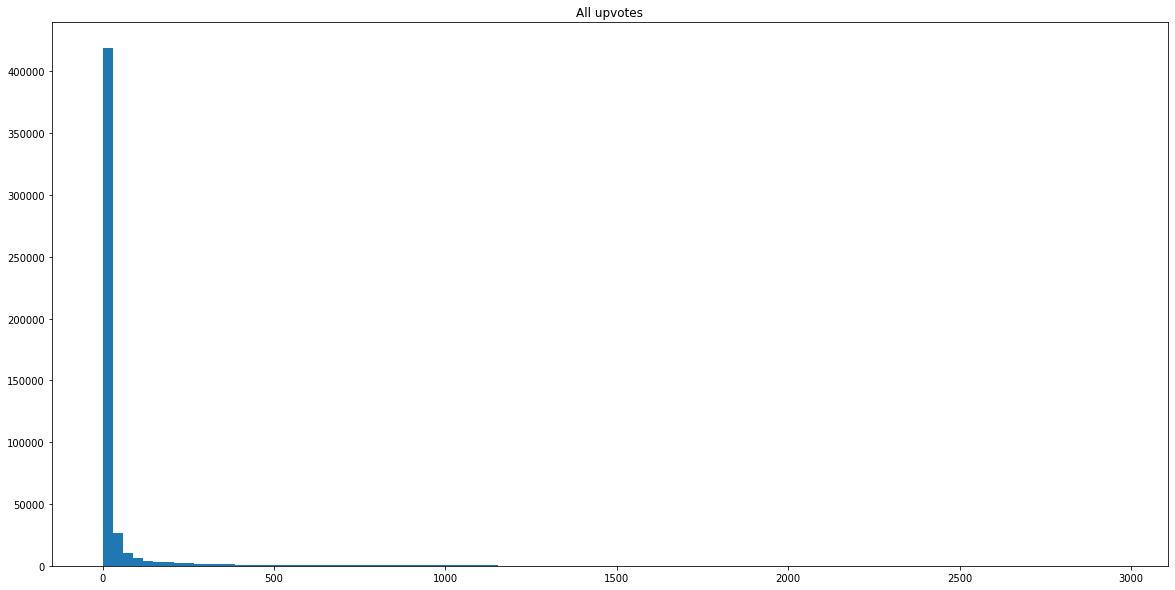

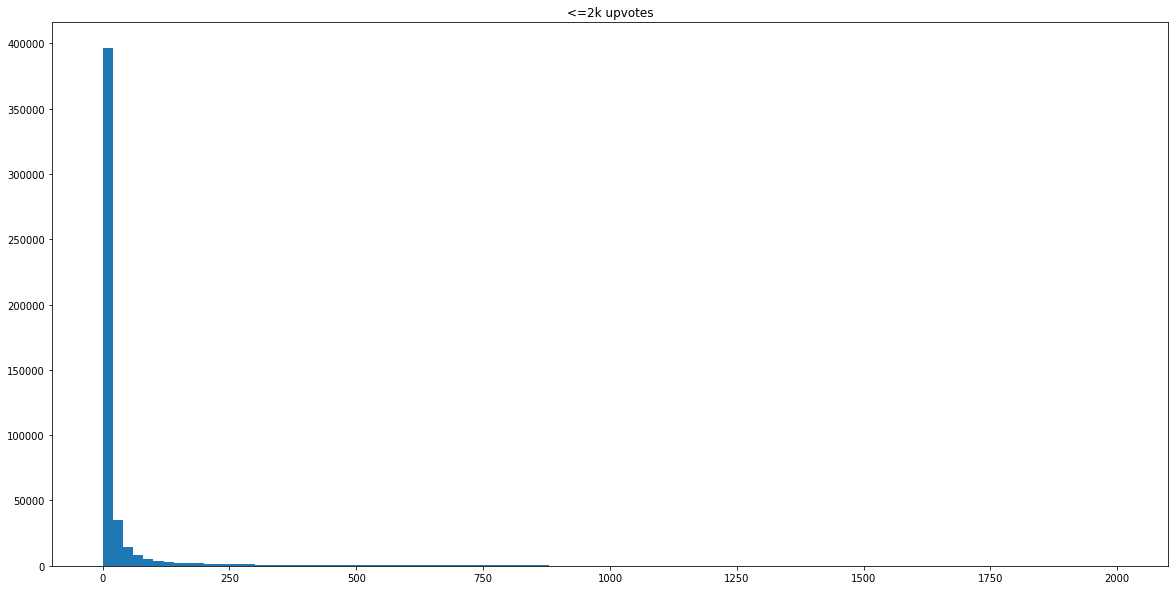

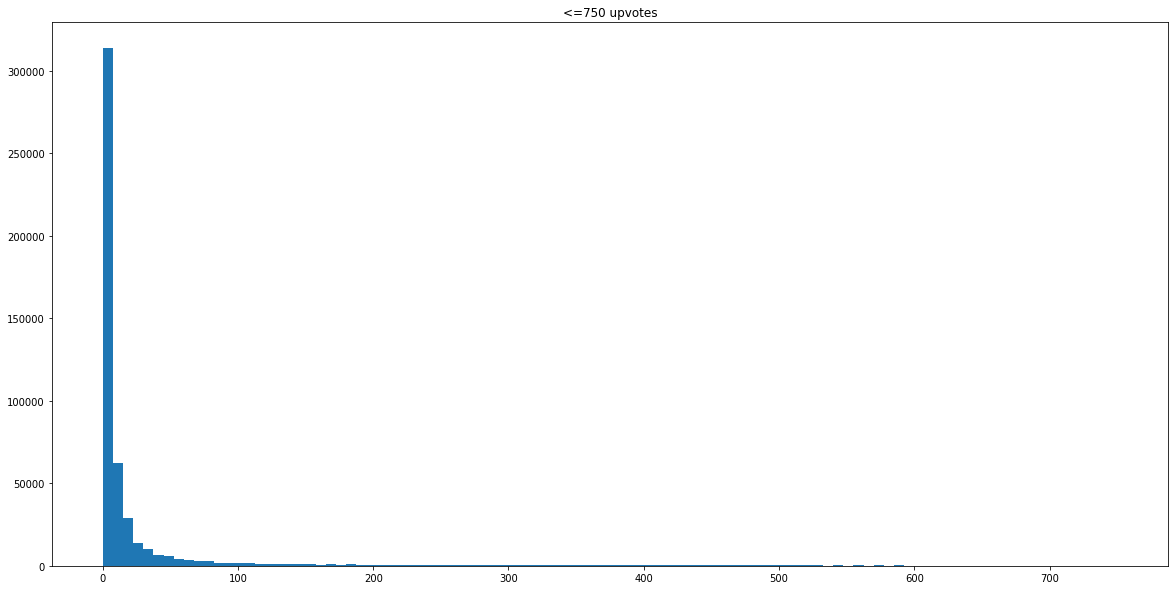

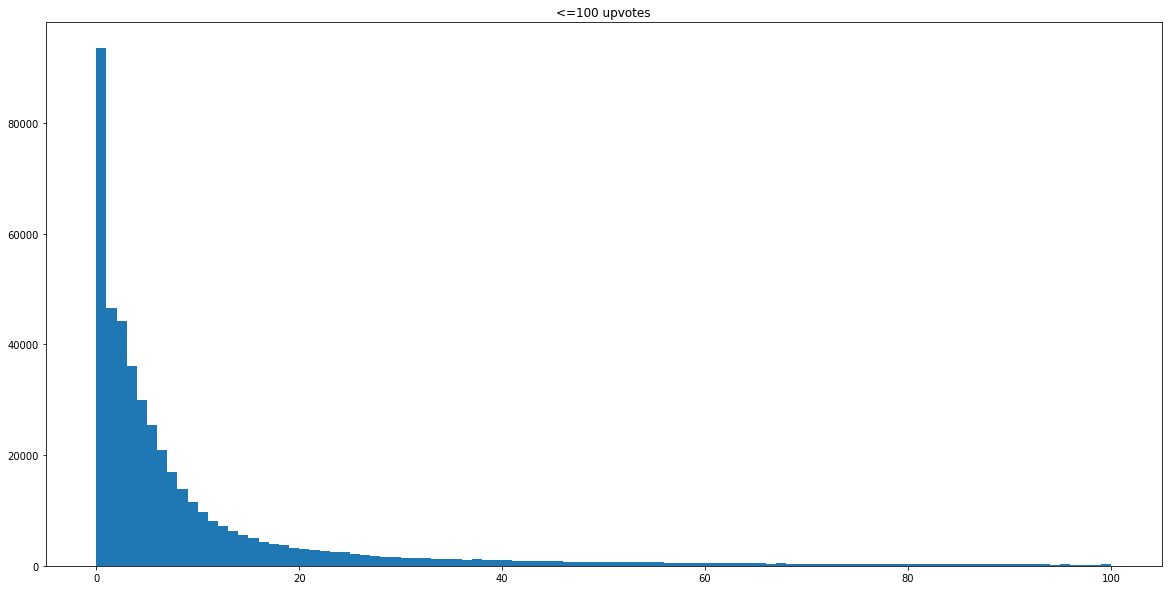

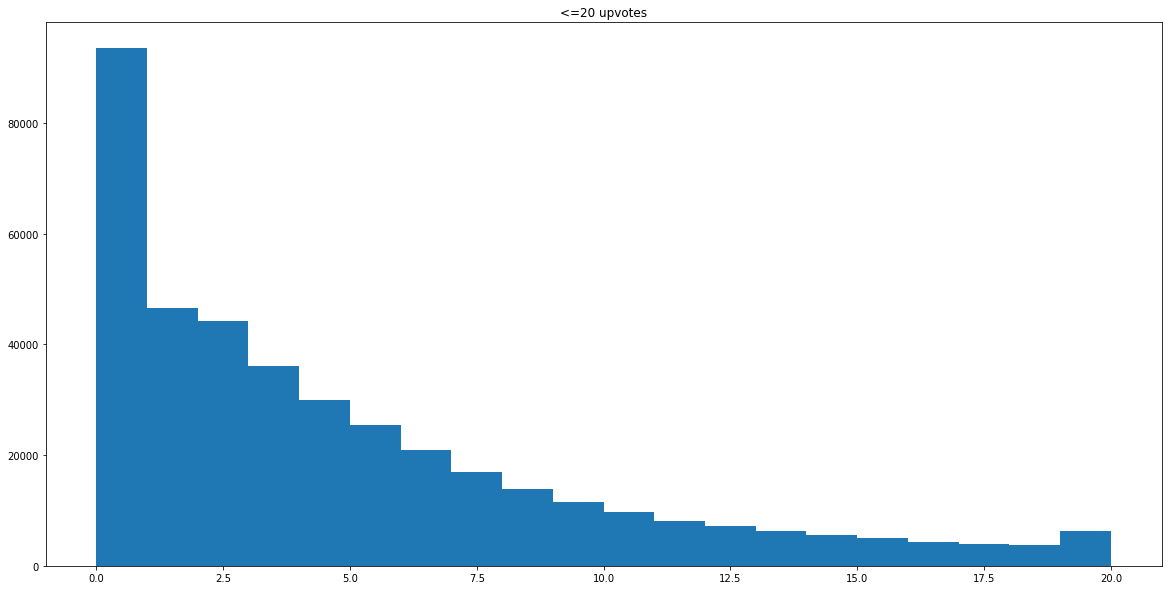

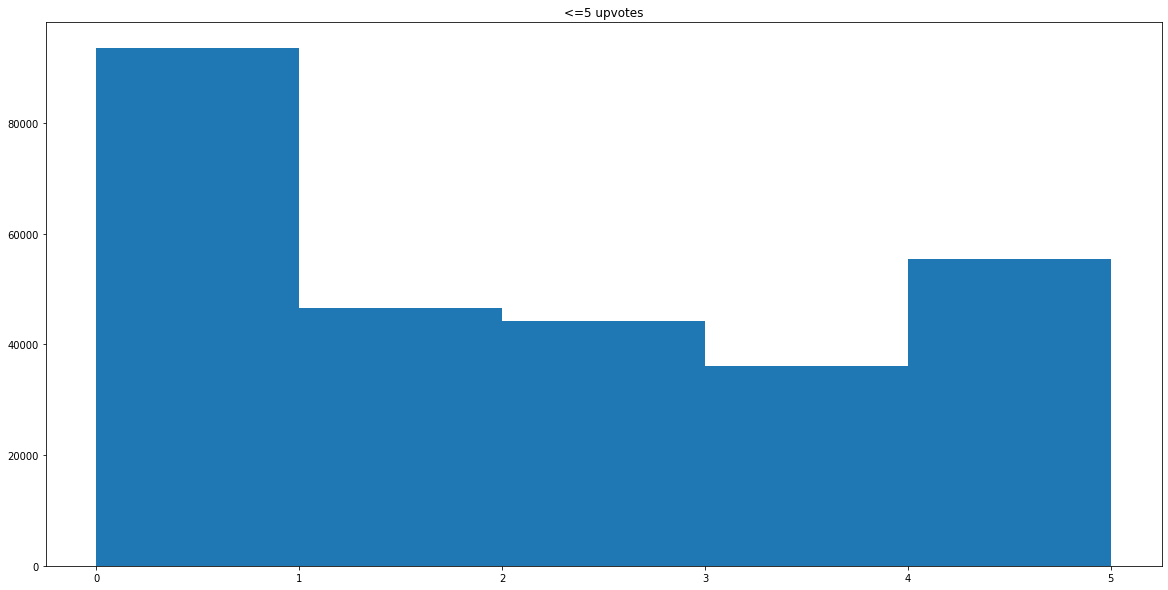

In [72]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df['up_votes'], bins=100)
plt.title('All upvotes')
plt.show()
plt.hist(df[df['up_votes'] <=2000]['up_votes'] , bins=100)
plt.title('<=2k upvotes')
plt.show()
plt.hist(df[df['up_votes'] <=750]['up_votes'] , bins=100)
plt.title('<=750 upvotes')
plt.show()
plt.hist(df[df['up_votes'] <=100]['up_votes'] , bins=100)
plt.title('<=100 upvotes')
plt.show()
plt.hist(df[df['up_votes'] <=20]['up_votes'] , bins=20)
plt.title('<=20 upvotes')
plt.show()

plt.hist(df[df['up_votes'] <=5]['up_votes'] , bins=5)
plt.title('<=5 upvotes')
plt.show()

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['title'], 20)

to 209004
the 208992
in 206018
of 172030
and 85565
for 79149
on 72709
is 41965
with 38972
as 38673
by 37099
from 34727
at 32193
that 28861
after 28761
has 28618
china 26232
says 25062
over 24786
us 24600


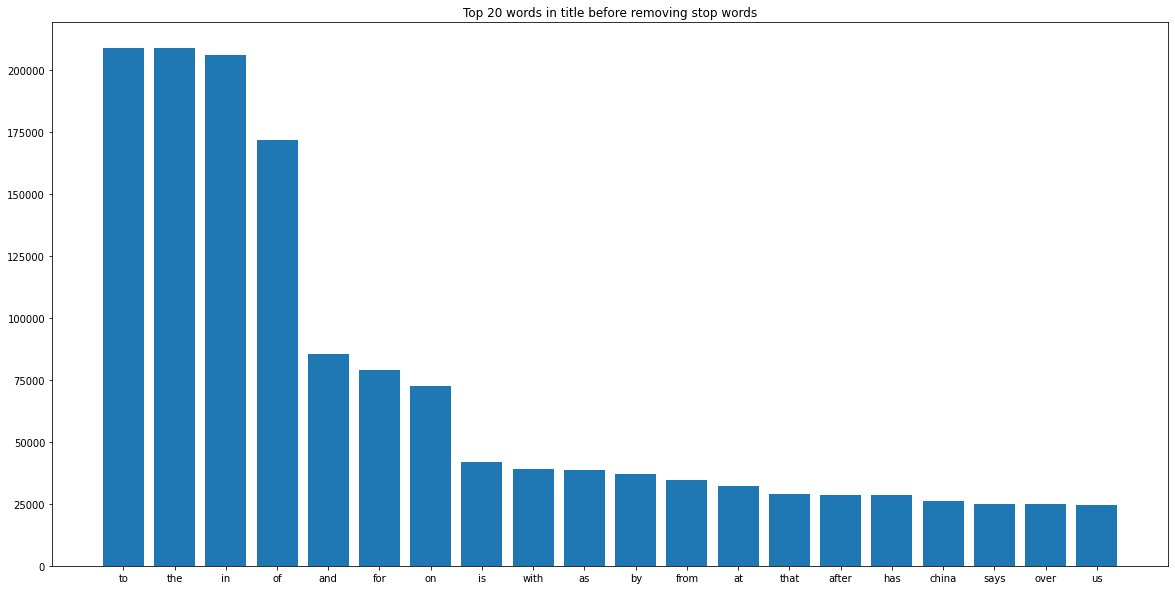

In [74]:
for word, freq in common_words:
    print(word, freq)
plt.bar([v[0] for v in common_words], [v[1] for v in common_words])
plt.title('Top 20 words in title before removing stop words')
plt.show()

In [75]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['title'], 20)

china 26232
says 25062
new 23102
syria 18938
russia 18584
world 17755
police 16479
government 16063
israel 16001
iran 15744
president 15098
killed 14200
people 13754
state 13350
attack 12825
war 12705
russian 12229
military 11755
uk 11638
south 11448


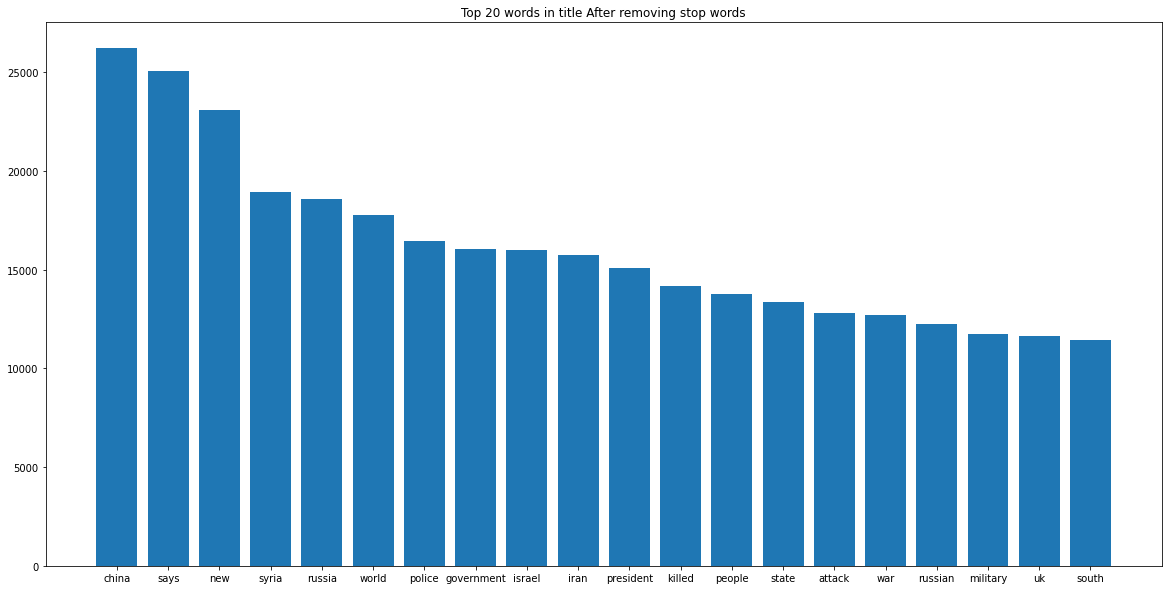

In [76]:
for word, freq in common_words:
    print(word, freq)
plt.bar([v[0] for v in common_words], [v[1] for v in common_words])
plt.title('Top 20 words in title After removing stop words')
plt.show()

In [77]:
up_votes_sorted = df.sort_values(by ='up_votes',ascending=False)

In [78]:
up_votes_sorted.head()

,date_created,up_votes,title,over_18,author,year,day_of_week,season
168034,2013-03-23,2960,Twitter sued £32m for refusing to reveal anti-...,False,anutensil,2013,5,1
192941,2013-06-27,2960,A mysterious Facebook character from Zimbabwe ...,False,DougBolivar,2013,3,2
133351,2012-08-25,2960,Navy advisor stripped of her career for alerti...,False,MAAATLLLOOOCK,2012,5,2
286930,2014-07-04,2959,African leaders should not be prosecuted for w...,False,samueloakford,2014,4,2
218276,2013-10-04,2958,"Swiss to vote on 2,500 franc basic income for ...",False,rstevens94,2013,4,3


pirate bay founder 11
german pirate party 8
pm david cameron 6
atlantic bluefin tuna 5
nuclear power plant 5
osama bin laden 5
great barrier reef 5
ttip trade deal 5
yr old girl 4
anti government protests 4
mexico drug war 4
south china sea 4
100 000 people 4
anti government protesters 4
roman catholic church 4
founder julian assange 4
23 yr old 4
anti piracy outfit 4
year old girl 4
anti piracy group 4
german chancellor angela 4
chancellor angela merkel 4
human rights watch 3
north korea cuts 3
17 yr old 3
kim jong il 3
latin american countries 3
coal fired power 3
iran north korea 3
23 year old 3
president evo morales 3
elephant rhino poaching 3
british pm david 3
saudi king abdullah 3
wikileaks founder julian 3
london met police 3
human rights abuses 3
iranian president ahmadinejad 3
pro democracy protests 3
cairo tahrir square 3
rupert murdoch news 3
phone hacking scandal 3
internet file sharing 3
student richard dwyer 3
nuclear power station 3
wikileaks julian assange 3
uk home se

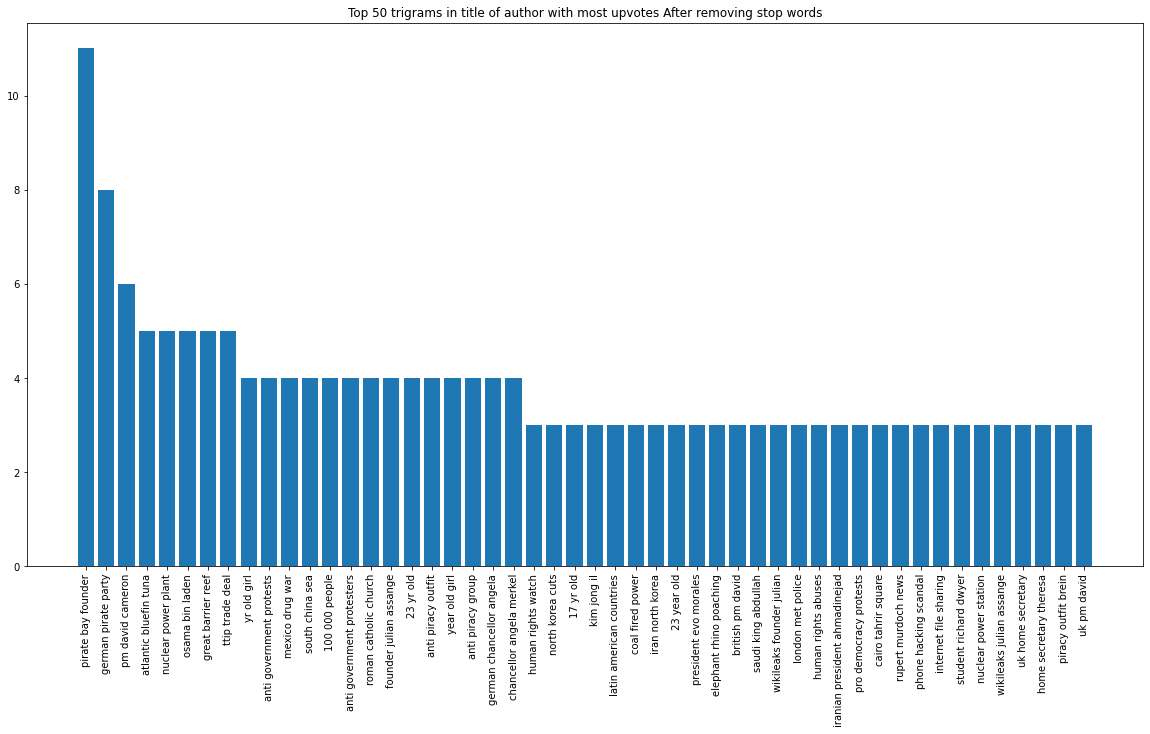

In [84]:
common_words_trigram = get_top_n_trigram(df[df['author'] == 'maxwellhill']['title'], 50)

for word, freq in common_words_trigram:
    print(word, freq)
plt.bar([v[0] for v in common_words_trigram], [v[1] for v in common_words_trigram])
plt.title('Top 50 trigrams in title of author with most upvotes After removing stop words')
plt.xticks(rotation=90)
plt.show()


bashar al assad 51
president bashar al 43
central african republic 40
chancellor angela merkel 36
aung san suu 33
san suu kyi 33
president vladimir putin 30
international criminal court 26
south china sea 26
syrian president bashar 24
ban ki moon 24
democratic republic congo 24
president mohammed morsi 22
president hugo chavez 20
german chancellor angela 19
anti government protests 18
new prime minister 18
president bashar assad 16
president mohamed morsi 16
nobel peace prize 15
president hosni mubarak 15
president dilma rousseff 15
turkish prime minister 14
anti government protesters 14
human rights watch 14
european central bank 14
world war ii 13
south african president 13
recep tayyip erdogan 13
al qaeda linked 13
syria civil war 13
east china sea 13
ali abdullah saleh 12
international monetary fund 12
president xi jinping 12
leader aung san 11
president jacob zuma 11
fired tear gas 11
president nicolas sarkozy 11
human rights activists 11
president robert mugabe 11
sudan south sud

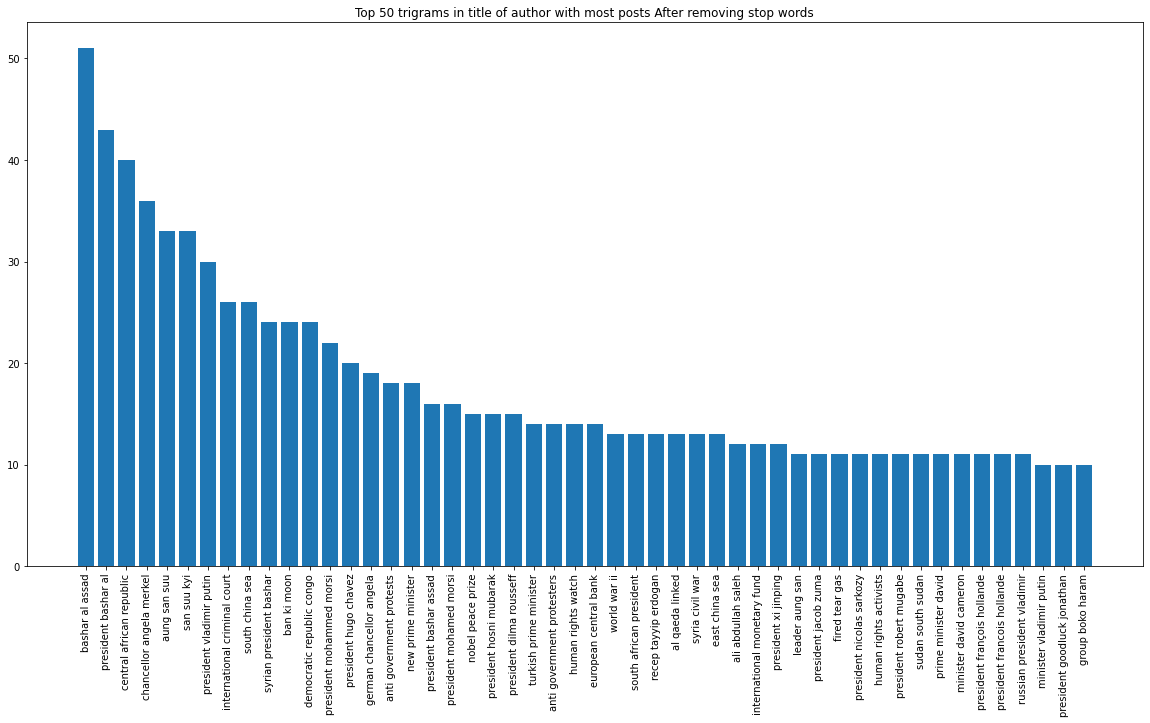

In [85]:

common_words_trigram = get_top_n_trigram(df[df['author'] == 'davidreiss666']['title'], 50)

for word, freq in common_words_trigram:
    print(word, freq)
plt.bar([v[0] for v in common_words_trigram], [v[1] for v in common_words_trigram])
plt.title('Top 50 trigrams in title of author with most posts After removing stop words')
plt.xticks(rotation=90)
plt.show()

south china sea 405
bashar al assad 262
president bashar al 198
central african republic 187
president vladimir putin 158
prime minister shinzo 147
minister shinzo abe 147
chancellor angela merkel 139
great barrier reef 136
islamic state group 133
islamic state militants 132
international criminal court 131
world war ii 129
president barack obama 125
human rights watch 113
osama bin laden 99
syrian president bashar 95
ban ki moon 89
nuclear power plant 86
greenhouse gas emissions 83
democratic republic congo 77
islamic state iraq 77
russian president vladimir 74
aung san suu 71
san suu kyi 71
united arab emirates 71
recep tayyip erdogan 70
german chancellor angela 70
world health organization 69
fukushima nuclear plant 68
papua new guinea 66
year old girl 64
president bashar assad 64
prime minister david 64
minister david cameron 64
minister benjamin netanyahu 63
secretary state john 63
state john kerry 63
fight islamic state 63
prime minister benjamin 62
president dilma rousseff 60
00

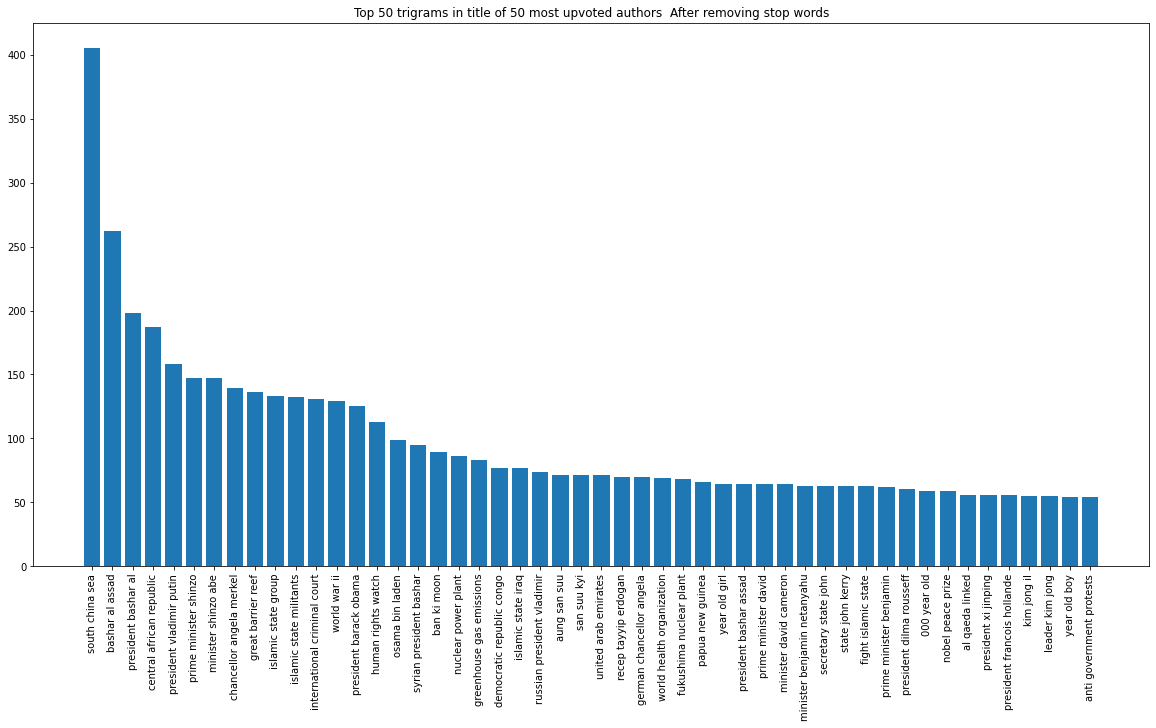

In [89]:

common_words_trigram = get_top_n_trigram(df[df['author'].isin(top50_author_by_upvote)]['title'], 50)

for word, freq in common_words_trigram:
    print(word, freq)
plt.bar([v[0] for v in common_words_trigram], [v[1] for v in common_words_trigram])
plt.title('Top 50 trigrams in title of 50 most upvoted authors  After removing stop words')
plt.xticks(rotation=90)
plt.show()

In [91]:

df.groupby('author')['over_18'].sum().sort_values(ascending=False).reset_index().head(10)

,author,over_18
0,readerseven,6.0
1,SyrianGuy,4.0
2,Rocker13666,4.0
3,ScotiaTide,4.0
4,downtown14,3.0
5,misterAction,3.0
6,uptodatepronto,3.0
7,Barack-OJimmy,2.0
8,URPerfect,2.0
9,pets_or_meat,2.0


In [92]:
data.loc[data['up_votes'].idxmax()].reset_index()

,index,377200
0,time_created,1434818471
1,date_created,2015-06-20
2,up_votes,21253
3,down_votes,0
4,title,A biotech startup has managed to 3-D print fak...
5,over_18,False
6,author,KRISHNA53
7,category,worldnews
8,year,2015
9,season,2
